## t-I response current to t-J response
1. Import the original data
2. Optimize the parameter for the baseline
3. Make the baseline and save it in a new directory /baselines

In [2]:
'''
Read the original data in df_1, df_2, ...
1. Change the directory
2. Run
'''

# Choose the directory
csv_dir = '/Users/yukiharuta/Master/05_UVic/01_Project/04_Perovskite-FCG/04_X-ray-detection/230602_Au-MPB-Ga_polished/230602_tI_Au-MPB-Ga_polished_02-05'

import pandas as pd
import os
import glob

# Store the selected file paths in a list
csv_list = glob.glob(f'{csv_dir}/*.csv')
csv_list.sort()

# Make dataframes with its label df_1, df_2, ...
files = []
df_list = []
for i, file_path in enumerate(csv_list):
    file_name = os.path.basename(file_path)
    files.append(file_name)
    mkdata = f'df_{i+1}= pd.read_csv("{file_path}")'
    mklist = f'df_list.append(df_{i+1})'
    exec(mkdata)
    exec(mklist)
    print('{:02d}: {}'.format(i+1, file_name))

01: 230528-0.2mmh_-12.0V.csv
02: 230528-0.2mmh_-120.0V.csv
03: 230528-0.2mmh_-2.4V.csv
04: 230528-0.2mmh_-24.0V.csv
05: 230528-0.2mmh_-4.8V.csv
06: 230528-0.2mmh_-48.0V.csv
07: 230528-0.2mmh_test_33.6uGys_-2.4V.csv
08: 230528-0.2mmh_test_33.6uGys_-2.4V_large-collimator.csv
09: 230530-0.5mmh-test_-15.5V_30cm-0.45-3.15mA_4.8-33.6uGys.csv
10: 230530-0.5mmh-test_-155V_25mA-30cm-266.9uGys_1atm.csv
11: 230530-0.5mmh-test_-155V_3.15mA-30cm-33.6uGys_1atm.csv
12: 230530-0.5mmh-test_-155V_33.6uGys_1atm.csv
13: 230530-0.5mmh_-15.5V.csv
14: 230530-0.5mmh_-155.0V.csv
15: 230530-0.5mmh_-3.1V.csv
16: 230530-0.5mmh_-31.0V.csv
17: 230530-0.5mmh_-6.2V.csv
18: 230530-0.5mmh_-62.0V.csv


/Users/yukiharuta/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


230530-0.5mmh-test_-15.5V_30cm-0.45-3.15mA_4.8-33.6uGys.csv


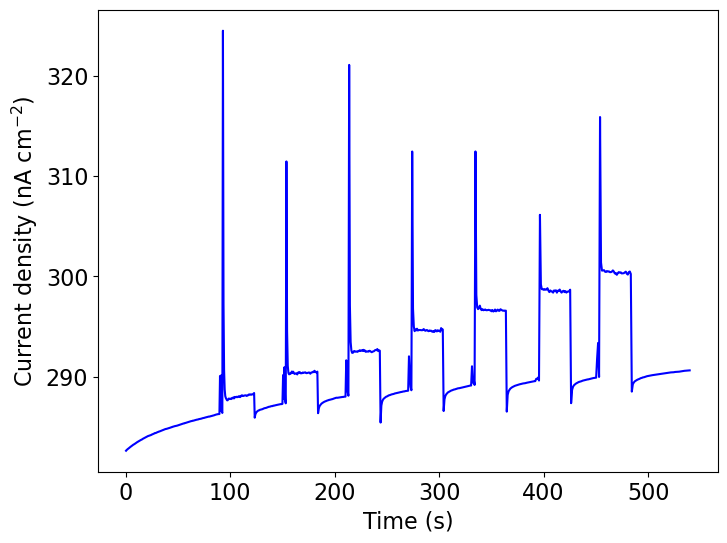

In [3]:
"""
Choose the file, label name
"""
file_ID = 9
label_name = files[file_ID-1] #'test'
area = 0.1 #cm2
J_unit = 'nA/cm2' # 'pA/cm', 'nA/cm2', 'µA/cm2', 'mA/cm2'
time_offset = 0 # s

'''
Don't change from here
'''
import matplotlib.pyplot as plt
from utilsplot import ItoJ, offset_XY

# Check
print(files[file_ID-1])
# Read the data
df_plot = df_list[file_ID-1]
# Prepare time list
x = df_plot['Time (s)'].to_list()
# Prepare J list
y = df_plot['Current (A)'].to_list()
J, J_label = ItoJ(y,area,J_unit)

# Remove first {time_offset} seconds
t, J = offset_XY(x,J,time_offset)

# Make a figure
fig = plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 16

# Plot
plt.plot(t, J, linestyle='-', label=label_name, color='blue')

# Design
plt.xlabel('Time (s)')
# plt.legend(loc='best', frameon = False)
# plt.xlim(0,100)
plt.ylabel(J_label)
plt.show()

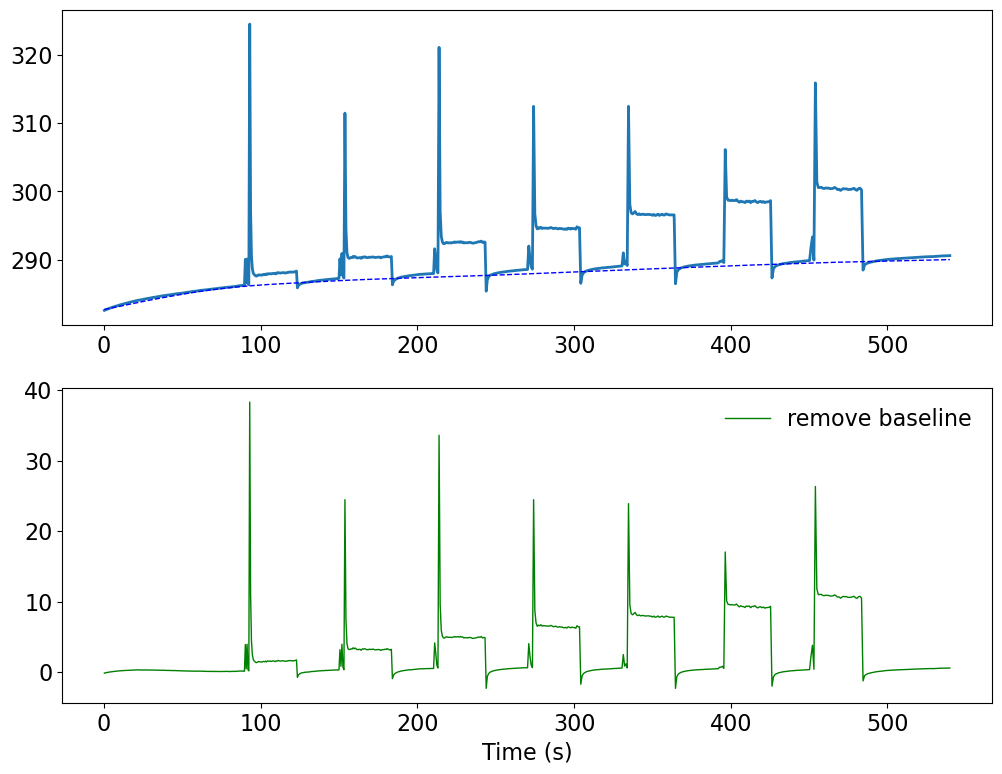

In [4]:
"""
Imput the optimized parameters to extract the best baseline
"""

# Optimized parameter
paramAsLS = [316227.7660168379, 0.01]

import os
from utilsplot import outFigCSV

## Make directory to save the data
data_dir = f'{csv_dir}/bkg'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
# Save_path
save_path = f'{data_dir}/{files[file_ID-1][:-4]}-bkg'

# prepare J, the unit should be always 'nA/cm2'
J_ = offset_XY(x,ItoJ(y,area,'nA/cm2')[0],time_offset)[1]

# Execute
# outFigCSV(t,J_,paramAsLS, save_path, True)
outFigCSV(t,J_,paramAsLS, save_path, False)

paramAsLS: [lam, p] = [10000.0, 0.01]


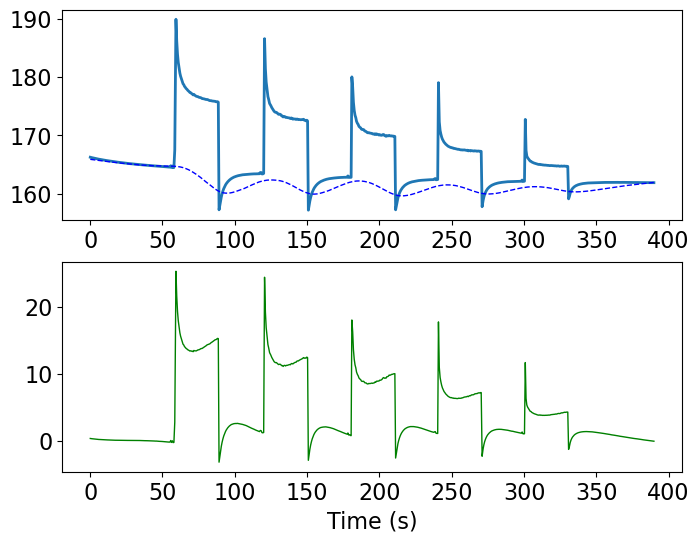



paramAsLS: [lam, p] = [31622.776601683792, 0.01]


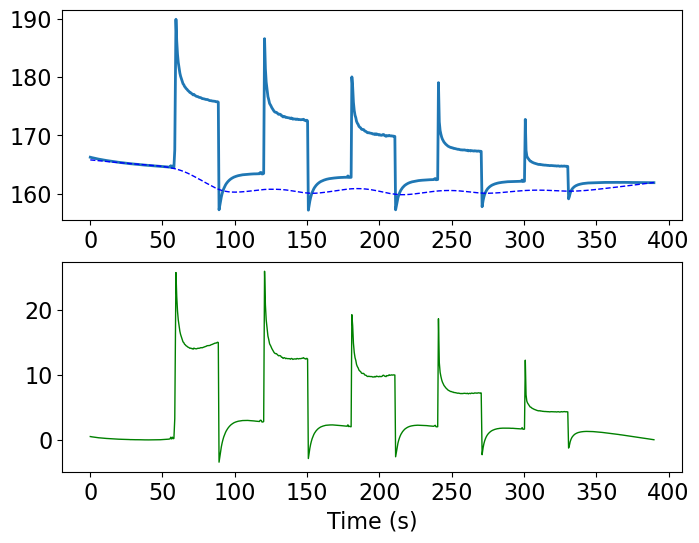



paramAsLS: [lam, p] = [100000.0, 0.01]


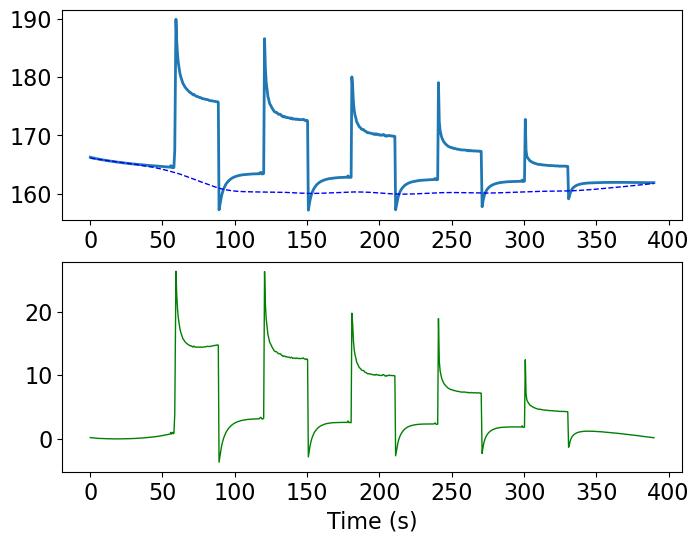



paramAsLS: [lam, p] = [316227.7660168379, 0.01]


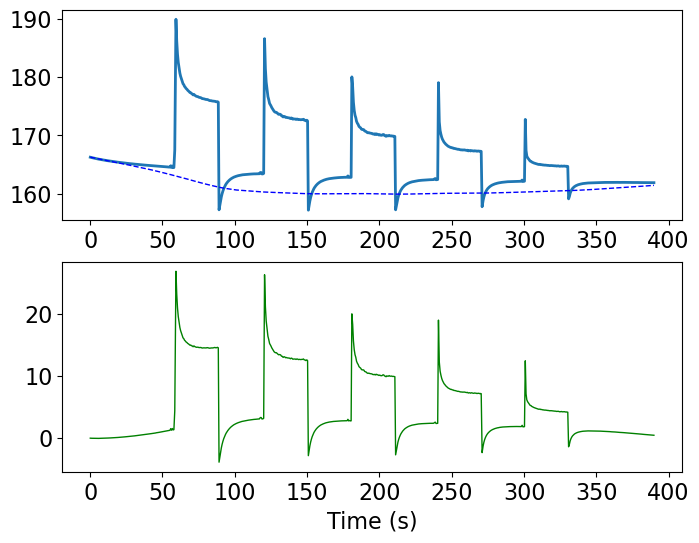

In [6]:
"""
Baseline remove
https://qiita.com/lcmtk/items/06bdd965d8a79bbfd0a9

Optimize the parameters to extract the best baseline
"""

import csv
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.sparse import spdiags
import scipy.sparse.linalg as spla
# from utilsplot import baseline_als, outFigCSV
from utilsplot import baseline_test

# Set parameters for the baseline estimation #[lam ,p], lam: 10^2 - 10^9, p: 0.001 - 0.1
# Baseline estimation in AsLS is parameterized by the weights p and the coefficient of the penalty term lam when ( W(p) + lam*D'D )z = Wy

# lam test: higher lam means linear
paramAsLSs = []
for i in range(4):
    lams = 10**(4+0.5*i)
    paramAsLSs.append([lams, 0.01])
    
# paramAsLSs = [[10**5, 0.001], [10**5, 0.01],[10**5, 0.1],[10**5, 0.15]] # p test
# paramAsLSs = []
# for i in range(4):
#     ps = 0.005 * (i+1)
#     paramAsLSs.append([10**6, ps])

# Execute
for paramAsLS in paramAsLSs:
    print(f'paramAsLS: [lam, p] = {paramAsLS}')
    baseline_test(t,J,paramAsLS)
    print('\n')